# ZUNYI LIN

## Research question/interests

1. What goal and project duration setting are most likely to fail on kickstarters?
2. What project category can have the highest pledge vs goal ratio?


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("../data/raw/ks-projects-201801.csv")

In [3]:
dataset

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Milestone 3

#### Task 1 - Data Analysis

In [4]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

print("Number of rows and columns respectively:", dataset.shape)
print("Columns in the dataset:", dataset.columns)

Number of rows and columns respectively: (378661, 15)
Columns in the dataset: Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


#### Remove unnecessary data

In [5]:
dataset1 = dataset.drop(columns = ['ID', 'usd pledged', 'currency', 'goal', 'pledged', 'country'], inplace = False)
dataset1.head()

,name,category,main_category,deadline,launched,state,backers,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,1283.0,19500.00


In [6]:
dataset1 = dataset1.dropna()

In [7]:
dataset1 = dataset1.rename(columns={"usd_pledged_real": "pledged", "usd_goal_real": "goal", "state": "status"})

#### Get an overview of the data

In [8]:
dataset1.nunique(axis=0)

name             375764
category            159
main_category        15
deadline           3164
launched         378085
status                6
backers            3963
pledged          106065
goal              50339
dtype: int64

In [9]:
dataset1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

,count,mean,std,min,25%,50%,75%,max
backers,378657.000000,105.618544,907.189767,0.000000,2.000000,12.000000,56.000000,219382.000000
pledged,378657.000000,9059.018090,90973.819013,0.000000,31.000000,624.380000,4050.000000,20338986.270000
goal,378657.000000,45454.245896,1152956.113134,0.010000,2000.000000,5500.000000,15500.000000,166361390.710000


In [10]:
dataset1.describe(include='object').T

,count,unique,top,freq
name,378657,375764,New EP/Music Development,41
category,378657,159,Product Design,22313
main_category,378657,15,Film & Video,63584
deadline,378657,3164,2014-08-08,705
launched,378657,378085,1970-01-01 01:00:00,7
status,378657,6,failed,197716


In [11]:
dataset1.shape

(378657, 9)

#### added a new column duration(days) = deadline - launched

In [12]:
dataset2 = dataset1.copy()
dataset2['launched'] = pd.to_datetime(dataset2['launched'])
dataset2['deadline'] = pd.to_datetime(dataset2['deadline'])
dataset2['duration'] = (dataset2['deadline'] - dataset2['launched']).dt.days
dataset2['completion'] = (dataset2['pledged'] / dataset2['goal'])*100

In [13]:
# check the duration columns data 
dataset2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T

,count,mean,std,min,25%,50%,75%,max
backers,378657.000000,105.618544,907.189767,0.000000,2.000000,12.000000,56.000000,219382.000000
pledged,378657.000000,9059.018090,90973.819013,0.000000,31.000000,624.380000,4050.000000,20338986.270000
goal,378657.000000,45454.245896,1152956.113134,0.010000,2000.000000,5500.000000,15500.000000,166361390.710000
duration,378657.000000,33.481127,65.909502,0.000000,29.000000,29.000000,36.000000,16738.000000
completion,378657.000000,323.615448,26690.681450,0.000000,0.453333,13.466458,106.540000,10427789.000000


#### Remove project that is in canceled, live, suspended and undefined

In [14]:
#Due to the large dataset, it is too slow to work with, 
#I have to reduce the rows inorder to get some progress within deadline
#Only getting the data from goal between 25%-75%
dataset2 = dataset2[(dataset2['status'] != 'canceled')
                    & (dataset2['status'] != 'undefined')
                    & (dataset2['status'] != 'live')
                    & (dataset2['status'] != 'suspended')]

# check the duration columns data 
dataset2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))).T


,count,mean,std,min,25%,50%,75%,max
backers,331672.000000,116.382580,965.431577,0.000000,2.000000,15.000000,63.000000,219382.000000
pledged,331672.000000,9943.549278,96733.367226,0.000000,50.000000,788.000000,4608.000000,20338986.270000
goal,331672.000000,41509.658749,1108934.642072,0.010000,2000.000000,5000.000000,15000.000000,166361390.710000
duration,331672.000000,32.954889,12.713279,0.000000,29.000000,29.000000,35.000000,91.000000
completion,331672.000000,351.041365,28253.618765,0.000000,0.750000,20.000000,109.500000,10427789.000000


#### Check data outliers with box plot

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

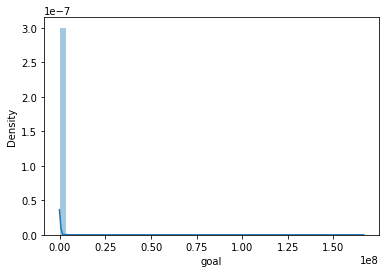

In [15]:
sns.distplot(dataset2['goal'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='backers', ylabel='Density'>

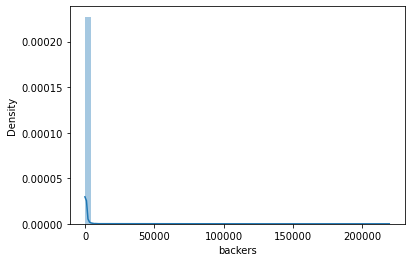

In [16]:
sns.distplot(dataset2['backers'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='completion', ylabel='Density'>

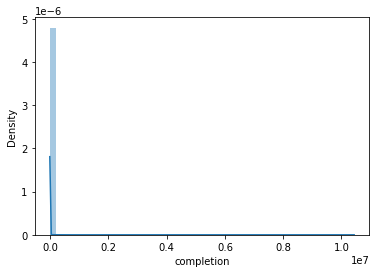

In [17]:
sns.distplot(dataset2['completion'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pledged', ylabel='Density'>

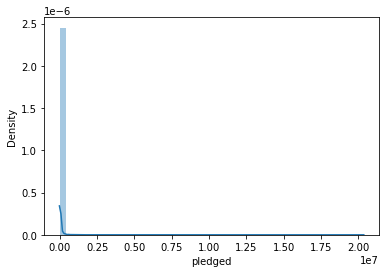

In [18]:
sns.distplot(dataset2['pledged'])

#### From the distribution plot we could see there are some outliers on the data
#### Remove outliers

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goal', ylabel='Density'>

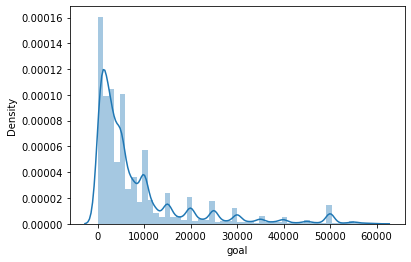

In [19]:
dataset3 = dataset2[(dataset2['goal'] < 60000)
                   & (dataset2['backers'] < 200)
                   & (dataset2['completion'] < 200)
                   & (dataset2['pledged'] < 15000)]
sns.distplot(dataset3['goal'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='backers', ylabel='Density'>

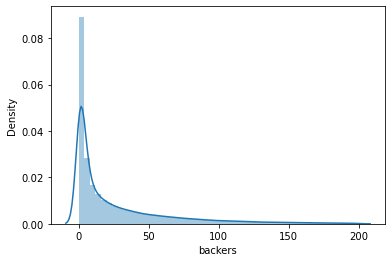

In [20]:
sns.distplot(dataset3['backers'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='completion', ylabel='Density'>

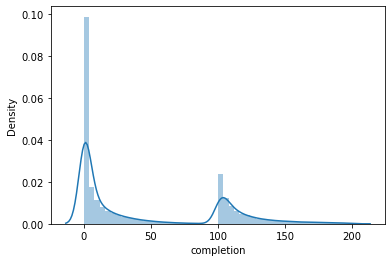

In [21]:
sns.distplot(dataset3['completion'])

/Users/zunyilin/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pledged', ylabel='Density'>

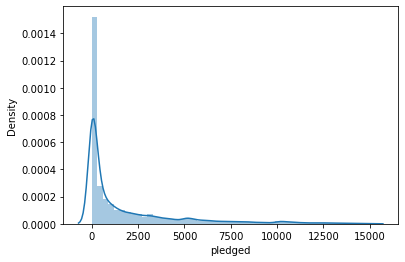

In [22]:
sns.distplot(dataset3['pledged'])

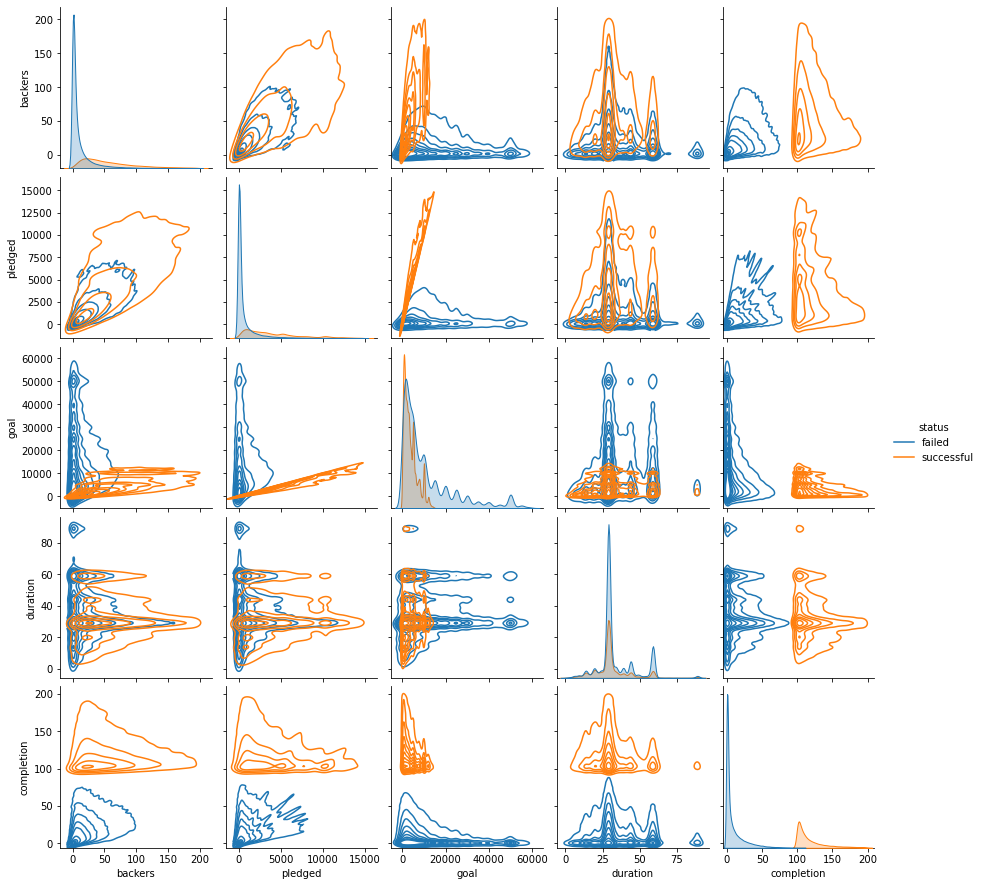

In [23]:
sns.pairplot(dataset3, hue = 'status', kind = 'kde')

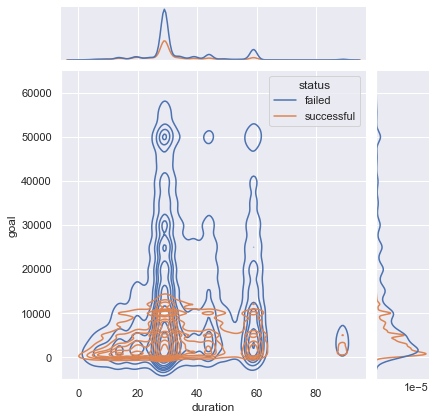

In [43]:
sns.jointplot(x='duration', y='goal', data=dataset3, kind='kde', hue='status')

<AxesSubplot:xlabel='main_category', ylabel='Count'>

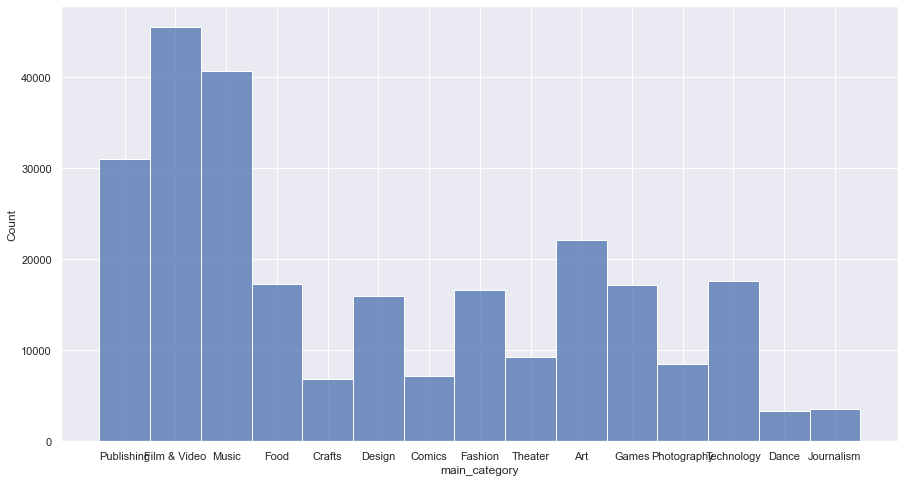

In [69]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x="main_category", data=dataset3)

<AxesSubplot:xlabel='main_category', ylabel='Count'>

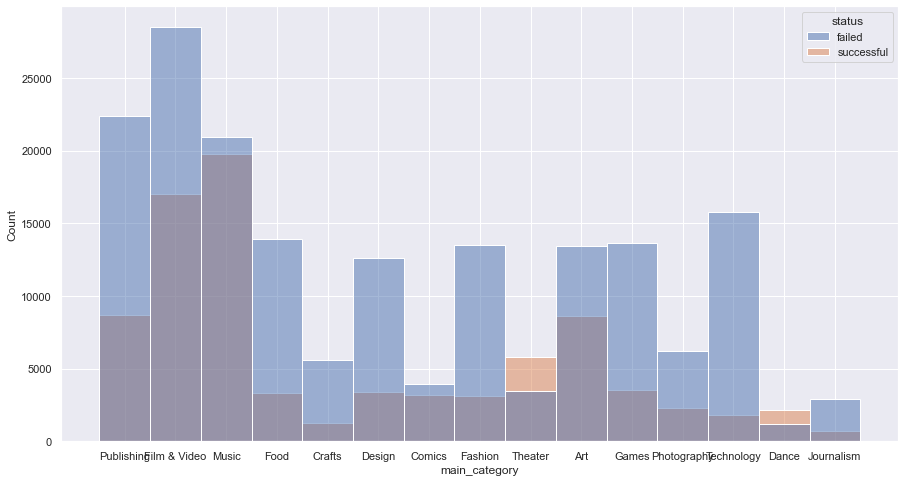

In [73]:
sns.histplot(x="main_category", data=dataset3, hue='status')

#### Task 2-3 - Load Raw and Processed Data

#### 1. Load Raw Data

In [25]:
import project_functions2 as pf2

In [26]:
datafilepath = "../data/raw/ks-projects-201801.csv"
rawdf = pf2.unprocessed(datafilepath)
rawdf

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


#### 2. Load Processed Data

In [27]:
processeddata = pf2.load_and_process(datafilepath)
processeddata

,ID,name,category,main_category,deadline,launched,status,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00
